# Simple project to detect spam in emails

In [16]:
# import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [17]:
# import data
spam_df = pd.read_csv("spam.csv")

In [18]:
spam_df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [19]:
spam_df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [20]:
# Turn Categories into numerical data. spam = 1, ham = 0
spam_df['spam'] = spam_df['Category'].apply(lambda x : 1 if x == 'spam' else 0)

In [21]:
spam_df

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [22]:
# Create split
x_train, x_test, y_train, y_test = train_test_split(spam_df.Message, spam_df.spam)

In [24]:
# Find word count and put data into a matrix
cv = CountVectorizer()
x_train_count = cv.fit_transform(x_train.values)

In [25]:
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
# train model
model = MultinomialNB()
model.fit(x_train_count, y_train)

MultinomialNB()

In [28]:
email_ham = ["hey wanna meet up for the game?"]
email_ham_count = cv.transform(email_ham)
model.predict(email_ham_count)

array([0], dtype=int64)

In [29]:
email_spam = ["reward money click"]
email_spam_count = cv.transform(email_spam)
model.predict(email_spam_count)

array([1], dtype=int64)

In [32]:
x_test_count = cv.transform(x_test)
print('Accuracy: ',model.score(x_test_count, y_test))

Accuracy:  0.9899497487437185


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(x_test_count)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

precision = precision_score(y_test, y_pred)
print('Precision:', precision)

recall = recall_score(y_test, y_pred)
print('Recall:', recall)

f1 = f1_score(y_test, y_pred)
print('F1 Score:', f1)


Accuracy: 0.9899497487437185
Precision: 0.9830508474576272
Recall: 0.9405405405405406
F1 Score: 0.9613259668508287


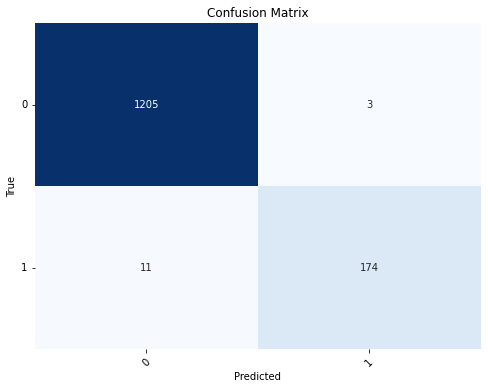

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test_count)

cm = confusion_matrix(y_test, y_pred)

class_labels = np.unique(np.concatenate((y_test, y_pred)))

plt.figure(figsize=(8, 6))
ax = plt.subplot()

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_labels, rotation=45)
ax.yaxis.set_ticklabels(class_labels, rotation=0)

# Show the plot
plt.show()
